<a href="https://colab.research.google.com/github/Halawany1/Gender-Classification/blob/main/cnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2 #for resizing images
import numpy as np 
import os #for opening images from folders
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg #for reading images
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.callbacks import History # for calculating AUC
import random
import pickle #for saving files
from sklearn.metrics import classification_report ,confusion_matrix , roc_curve, auc
from tensorflow.keras.optimizers import RMSprop


%matplotlib inline

dictionary for indicating man & woman

In [5]:
 class_index ={'man':0 , 'woman':1}

# Get Images function

In [6]:
def GetImages(array,path,begin,end,gender):
    images_array=array
    sub_imgs = os.listdir(path)
    sub_imgs =sub_imgs[begin:end]

    for index in sub_imgs: # go through men folder
        try:
           new_path = os.path.join(path,index) # getting path of img
           #print(new_path)
           img = mpimg.imread(new_path) #read img
      
           if img.shape!=(100,100,3):
              new_img = cv2.resize(img,(100,100)) # resize img to (100,100)
              images_array.append([new_img,class_index[gender]]) # pushing img
           else :
              images_array.append([img,class_index[gender]]) # pushing img              
        
        except Exception as e:
           pass
    print(f'{len(images_array)} were add successfully')
    return images_array

# shuffle function

In [7]:
def Shuffle(array):
    random.shuffle(array)

# Plotting function

In [8]:
def Plot(array):
    plt.figure(figsize=(10,10))#10 cm* 10 cm
    for i in range(25): #25 image
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        indx = random.randint(0,len(array)) #get random number between 0 and 4000
        plt.imshow(array[indx][0])
        name = array[indx][1]
        plt.xlabel(list(class_index.keys())[list(class_index.values()).index(name)]) #get name of selected image

# Seperate function

In [9]:
def Seperate(X,y,array):
    for feature,label in array:
        X.append(feature)
        y.append(label)

    X= np.array(X).reshape(-1,100,100,3)
    y= np.array(y).reshape(-1,1)

    return X,y

# save function

In [10]:
def Save(path,data):
    pickle_out=open(path,'wb') #path will file will be saved to
    pickle.dump(data,pickle_out) #saving data to file
    pickle_out.close()

# Upload function

In [11]:
def Load(path):   
    pickle_in=open(path,'rb')
    return pickle.load(pickle_in)

# ".استعد للنجاح وستحققه"

# showing number of images in men & women

In [12]:
man_path='/content/drive/MyDrive/man'
men_imgs = os.listdir(man_path) #taking all images from men folder
print(f'number of men imgs : {len(men_imgs)}')

woman_path='/content/drive/MyDrive/woman'
women_imgs = os.listdir(woman_path) #taking all images from women folder
print(f'number of women imgs : {len(women_imgs)}')

number of men imgs : 6896
number of women imgs : 9490


# preprocessing pipline


1-delete all images which are not in their right category

2- resize all imgs which have size upove & under 100x100 cm^2 to 100x100

3-give labels to data

4-seperate labels from features 

5-save all preprocessing

# start with training samples

first take 2500 image from men folder

In [13]:
training_data = [] # images will be pushed in this array

path='/content/drive/MyDrive/man'

gender='man'

training_data=GetImages(training_data,path,0,2500,gender)

2500 were add successfully


Done uploading 2500 of men 

Now uploading 2500 women

In [14]:
path='/content/drive/MyDrive/woman'

gender='woman'

training_data=GetImages(training_data,path,0,2500,gender)

5000 were add successfully


Now we have 5000 sample for training

# changing the order 
Of training images

In [15]:
Shuffle(training_data)

for sample in training_data[:20]: #print fist 20 sample
    print(sample[1])

1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
1


# plotting some random training images

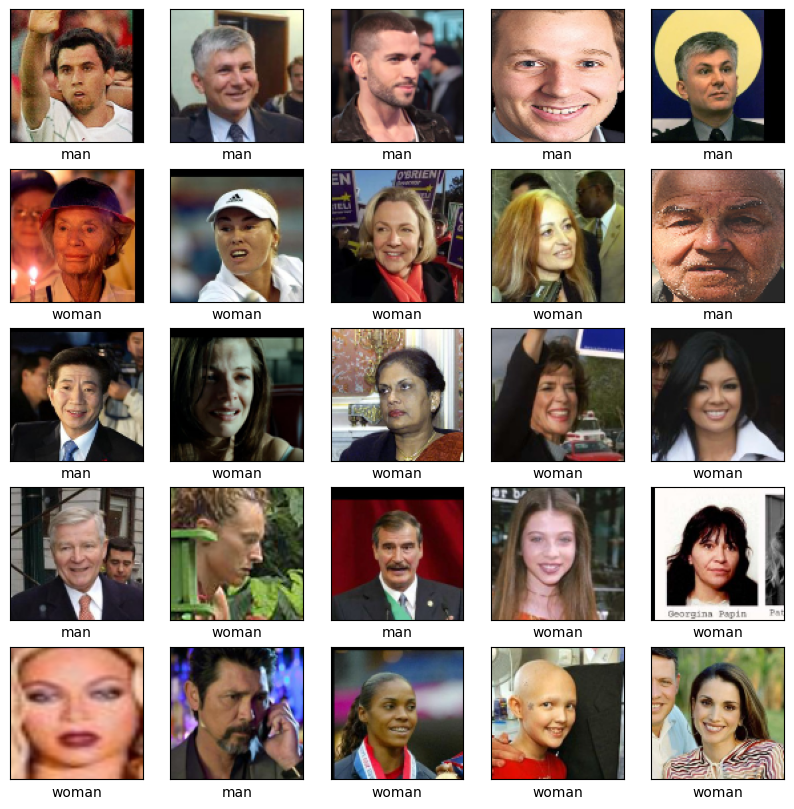

In [16]:
Plot(training_data)

# separate features from labels
in training data

In [17]:
X_train=[] # for features 
y_train=[] # for labels

X_train,y_train =Seperate(X_train,y_train,training_data)

In [18]:
print(X_train.shape)
print(y_train.shape)

(5000, 100, 100, 3)
(5000, 1)


# save X_train & y_train

In [19]:
X_train_path='/content/drive/MyDrive/X_train'
Save(X_train_path,X_train)

y_train_path='/content/drive/MyDrive/y_train'
Save(y_train_path,y_train)

# load X_train & y_train

In [20]:
X_train_path='/content/drive/MyDrive/X_train'
X_train=Load(X_train_path)

y_train_path='/content/drive/MyDrive/y_train'
y_train=Load(y_train_path)

In [21]:
print(X_train.shape)
print(y_train.shape)

(5000, 100, 100, 3)
(5000, 1)


#  ".لا تنتظر الفرصة، ابحث عنها واصنعها"

# testing images

In [22]:
testing_data = []

path='/content/drive/MyDrive/man'

gender='man'

testing_data=GetImages(testing_data,path,2100,3600,gender)

1500 were add successfully


Done uploading 1500 of men 

Now uploading 1500 women

In [23]:
path='/content/drive/MyDrive/woman'

gender='woman'

testing_data=GetImages(testing_data,path,2100,3600,gender)

3000 were add successfully


# Shuffling imgs
in test data

In [24]:
random.shuffle(testing_data)
for sample in testing_data[:20]:
    print(sample[1])

1
0
1
1
1
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1


# Plotting some random imgs

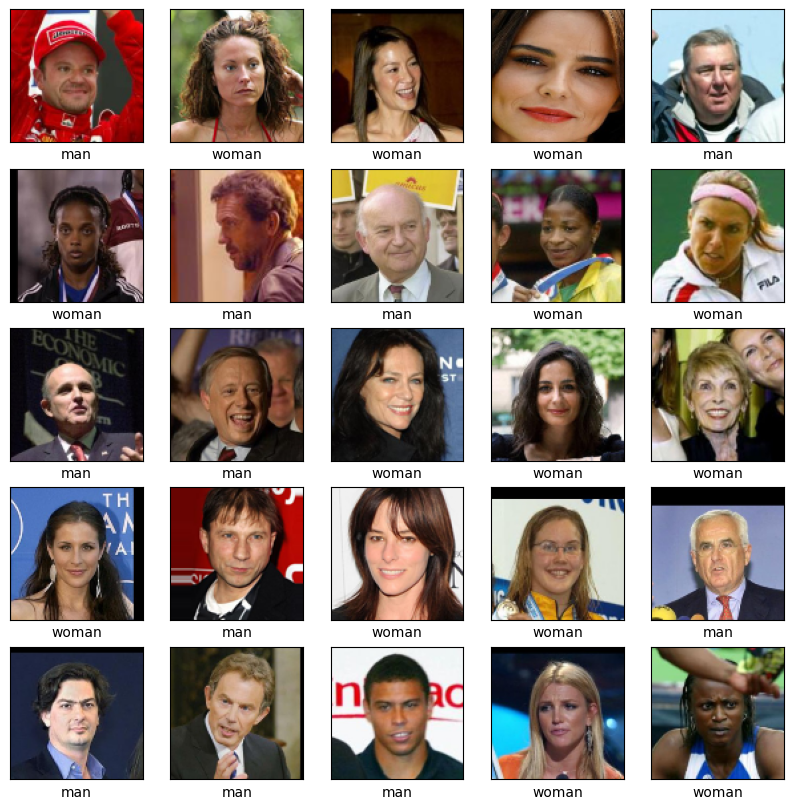

In [25]:
Plot(testing_data)

# Separate the imgs to X_test & y_test

In [26]:
X_test=[]
y_test=[]

X_test,y_test=Seperate(X_test,y_test,testing_data)

In [27]:
print(X_test.shape)
print(y_test.shape)

(3000, 100, 100, 3)
(3000, 1)


# save X_test & y_test

In [28]:
X_test_path='/content/drive/MyDrive/X_test'

y_test_path='/content/drive/MyDrive/y_test'


Save(X_test_path,X_test)
Save(y_test_path,y_test)

# load X_test & y_test

In [29]:
X_test_path='/content/drive/MyDrive/X_test'

y_test_path='/content/drive/MyDrive/y_test'


X_test=Load(X_test_path)
y_test=Load(y_test_path)

In [30]:
print(X_test.shape)
print(y_test.shape)

(3000, 100, 100, 3)
(3000, 1)


# ".لا شيء مستحيل، فقط قم بالعمل الجاد والتفاني وستحقق ما تريد"

# time for 1000 imges for predict

In [31]:
predict_data = []

path='/content/drive/MyDrive/man'

gender ='man'

predict_data=GetImages(predict_data,path,4000,4500,gender)

500 were add successfully


done uploading 500 men imges for predictions

now 500 for women

In [32]:
path='/content/drive/MyDrive/woman'

gender ='woman'

predict_data=GetImages(predict_data,path,4000,4500,gender)

1000 were add successfully


now we have down with 1000 imgs for predictions

# shuffling imges

In [33]:
Shuffle(predict_data)
for sample in predict_data[:20]:
    print(sample[1])

1
1
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
0


# ploting imges

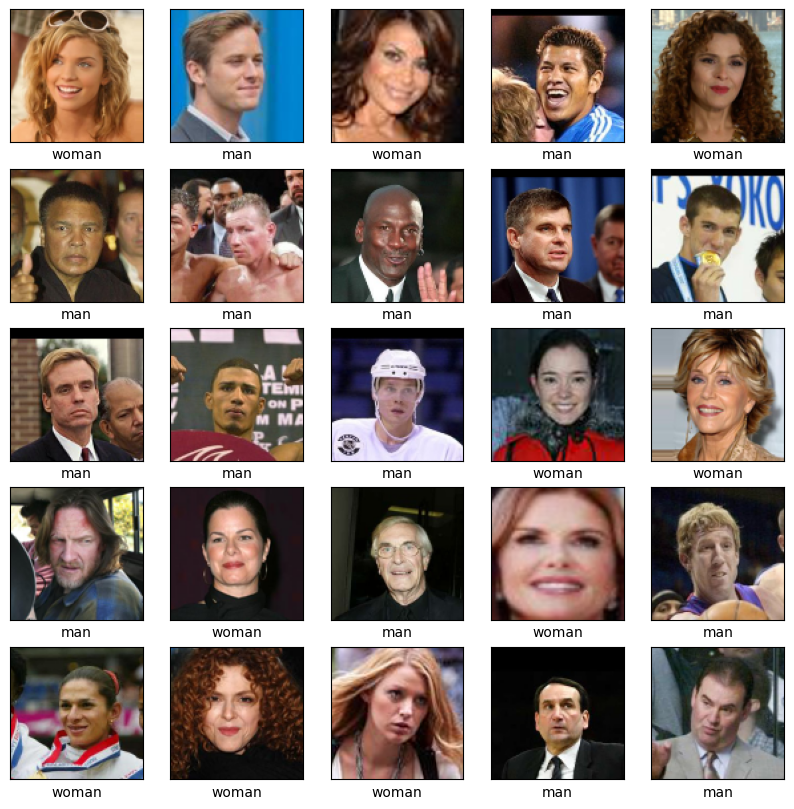

In [34]:
Plot(predict_data)

# seperate to X_predict & y_predict

In [35]:
X_predict =[]
y_predict = []

X_predict ,y_predict =Seperate(X_predict ,y_predict,predict_data)

In [36]:
print(X_predict.shape)
print(y_predict.shape)

(1000, 100, 100, 3)
(1000, 1)


# save X_predict & y_predict

In [37]:
X_predict_path='/content/drive/MyDrive/X_predict'
y_predict_path='/content/drive/MyDrive/y_predict'

Save(X_predict_path,X_predict)
Save(y_predict_path,y_predict)

# load X_predict & y_predict

In [38]:
X_predict_path='/content/drive/MyDrive/X_predict'
y_predict_path='/content/drive/MyDrive/y_predict'

X_predict=Load(X_predict_path)
y_predict=Load(y_predict_path)

In [39]:
print(X_predict.shape)
print(y_predict.shape)

(1000, 100, 100, 3)
(1000, 1)


# "لا تترك لشخص آخر سيطرة على حياتك، فأنت المسؤول الوحيد عن سعادتك ونجاحك"

# building model

In [40]:
model=Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
MaxPooling2D((2,2)),

Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),

Conv2D(128,(3,3),activation='relu'),

Flatten(),
Dense(64,activation='relu'),
Dense(32,activation='relu'),Dropout(rate=0.25),
Dense(2,activation='softmax'),
])

In [41]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [42]:
histroy=model.fit(X_train,y_train,epochs =20,validation_data=(X_test,y_test),batch_size=128,verbose=1)

Epoch 1/20
40/40 [==============================] - 18s 97ms/step - loss: 15.5579 - accuracy: 0.6068 - val_loss: 0.6250 - val_accuracy: 0.6543
Epoch 2/20
40/40 [==============================] - 2s 54ms/step - loss: 0.6649 - accuracy: 0.6274 - val_loss: 0.6204 - val_accuracy: 0.6187
Epoch 3/20
40/40 [==============================] - 2s 48ms/step - loss: 0.5850 - accuracy: 0.6640 - val_loss: 0.5630 - val_accuracy: 0.6860
Epoch 4/20
40/40 [==============================] - 2s 47ms/step - loss: 0.5494 - accuracy: 0.6824 - val_loss: 0.5590 - val_accuracy: 0.6873
Epoch 5/20
40/40 [==============================] - 2s 48ms/step - loss: 0.5051 - accuracy: 0.7270 - val_loss: 0.5152 - val_accuracy: 0.7590
Epoch 6/20
40/40 [==============================] - 2s 55ms/step - loss: 0.4574 - accuracy: 0.7696 - val_loss: 0.5041 - val_accuracy: 0.7687
Epoch 7/20
40/40 [==============================] - 2s 59ms/step - loss: 0.4734 - accuracy: 0.7682 - val_loss: 0.6076 - val_accuracy: 0.7437
Epoch 8/20


In [43]:
loss,acc=model.evaluate(X_test,y_test)
print(f'accuracy = {acc}')
print(f'loss = {loss}')

94/94 [==============================] - 1s 7ms/step - loss: 1.0453 - accuracy: 0.8043
accuracy = 0.8043333292007446
loss = 1.0453462600708008


Saving model

In [44]:
model.save('/content/drive/MyDrive/adam_model')

Loading model

In [45]:
# Load the saved model from disk
model = load_model('/content/drive/MyDrive/adam_model')

# prediction

Prediction for testing

In [46]:
Test_predictions=model.predict(X_test)

94/94 [==============================] - 1s 5ms/step


Unseen_Predictions

In [47]:
Unseen_predictions =model.predict(X_predict)

32/32 [==============================] - 0s 5ms/step


# wrong predictions

See how many samples were wrongly predicted from test & unseen data

In [48]:
Wrong_predict=0
for I in range(3000):
    if np.argmax(Test_predictions[I])!=y_test[I]:
         print(I)
         Wrong_predict+=1

print('-----------------')
print(f'total number of faild test_predictions : {Wrong_predict}' )

0
2
5
7
14
16
27
44
55
57
60
63
82
85
88
95
99
101
103
106
109
116
123
132
142
143
144
145
152
154
156
159
164
166
172
173
174
177
184
185
190
194
196
201
204
212
215
216
218
224
242
244
254
266
269
275
279
283
286
291
306
307
309
315
316
322
328
330
331
347
349
360
361
366
367
369
370
374
382
396
403
405
411
424
428
435
441
442
453
454
456
459
465
476
478
481
483
484
493
498
499
500
511
515
526
530
533
535
541
548
551
569
571
574
578
595
596
597
620
631
633
642
644
645
649
652
678
682
690
691
694
695
697
698
703
717
718
723
727
729
738
742
750
753
757
758
762
763
766
769
770
773
782
784
795
800
803
809
824
825
826
827
829
830
843
846
848
851
858
863
864
869
870
871
878
884
893
894
899
901
902
904
908
909
910
935
936
938
941
947
950
951
957
962
964
981
984
987
988
991
992
997
1005
1008
1010
1021
1022
1025
1027
1036
1040
1058
1065
1069
1072
1078
1084
1091
1099
1104
1105
1109
1111
1113
1122
1135
1136
1148
1150
1151
1153
1158
1163
1168
1172
1176
1178
1182
1188
1189
1197
1200
1207
1213
121

See how many samples were wrongly predicted from test

In [49]:
Wrong_predict=0
for I in range(1000):
    if np.argmax(Unseen_predictions[I])!=y_predict[I]:
         print(I)
         Wrong_predict+=1

print ('----------')
print(f'total number of faild unseen_predictions : {Wrong_predict}' )

1
3
4
6
11
16
34
42
43
47
50
52
53
57
61
63
76
81
84
87
92
95
101
104
121
128
131
138
140
143
145
148
153
158
162
166
172
176
177
178
184
189
191
197
200
202
203
204
205
206
208
211
213
217
220
226
227
229
231
233
240
244
247
253
257
258
262
269
273
275
280
286
288
299
301
302
304
306
309
313
316
317
319
321
323
339
340
345
355
359
362
364
366
368
369
370
378
388
391
392
398
399
429
430
432
434
437
441
442
447
448
455
464
466
469
476
483
486
489
490
494
497
504
511
515
521
522
524
535
543
555
556
565
567
571
576
579
584
587
593
599
602
608
612
613
614
617
624
625
626
630
631
636
648
649
661
668
678
683
692
700
707
709
712
718
721
724
727
735
738
739
741
746
749
751
752
756
772
775
781
783
791
805
806
807
809
810
815
816
828
842
845
848
849
850
853
855
865
871
873
875
878
884
885
889
896
900
906
908
909
910
914
915
920
923
927
931
945
947
956
959
964
967
976
980
985
987
988
990
992
----------
total number of faild unseen_predictions : 230


# plotting some of test predictions

In [50]:
def plot_img (i,predictions_array,true_lbl,img):
    predictions_array,true_lbl,img=predictions_array[i],true_lbl[i][0],img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    prediction_lbl=np.argmax(predictions_array)
    if prediction_lbl == true_lbl:
       color='blue'
    else:
       color='red'

    detected=list(class_index.keys())[list(class_index.values()).index(prediction_lbl)]
    actual=list(class_index.keys())[list(class_index.values()).index(true_lbl)]

    plt.xlabel('{} {:2.0f}% {}'.format(detected,100*np.max(predictions_array),actual),color=color)

In [51]:
def plot_value (i,predictions_array,true_lbl):
    predictions_array,true_lbl=predictions_array[i],true_lbl[i][0]
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(2),predictions_array,color='#777777')
    plt.ylim([0,1])
    prediction_lbl=np.argmax(predictions_array)
    thisplot[prediction_lbl].set_color('red')
    thisplot[true_lbl].set_color('blue')
    str=f'predicted = {np.argmax(predictions_array)} true = {true_lbl}'
    plt.xlabel(str)

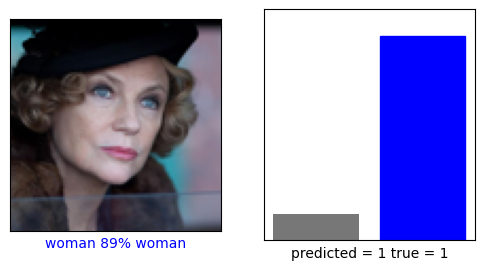

In [52]:
i=3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i,Test_predictions,y_test,X_test)
plt.subplot(1,2,2)
plot_value(i,Test_predictions,y_test)
plt.show()

# plotting some of unseen predictions

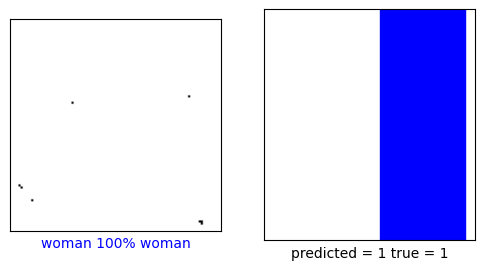

In [53]:
i=278
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i,Unseen_predictions,y_predict,X_predict)
plt.subplot(1,2,2)
plot_value(i,Unseen_predictions,y_predict)
plt.show()

# classification report , conclusion matrix

For test_prediction

In [54]:
predicted_array=np.argmax(Test_predictions,axis=-1)
predicted_array

array([0, 0, 0, ..., 1, 1, 0])

In [55]:
print(classification_report(y_test,predicted_array,target_names=class_index,digits=4))  
print('---------------------------------------------')
print(confusion_matrix(y_test,predicted_array))

              precision    recall  f1-score   support

         man     0.8277    0.7687    0.7971      1500
       woman     0.7841    0.8400    0.8111      1500

    accuracy                         0.8043      3000
   macro avg     0.8059    0.8043    0.8041      3000
weighted avg     0.8059    0.8043    0.8041      3000

---------------------------------------------
[[1153  347]
 [ 240 1260]]


For unseen prediction

In [56]:
predicted_array=np.argmax(Unseen_predictions,axis=-1)

In [57]:
print(classification_report(y_predict,predicted_array,target_names=class_index,digits=4))  
print('---------------------------------------------')
print(confusion_matrix(y_predict,predicted_array))

              precision    recall  f1-score   support

         man     0.8553    0.6500    0.7386       500
       woman     0.7177    0.8900    0.7946       500

    accuracy                         0.7700      1000
   macro avg     0.7865    0.7700    0.7666      1000
weighted avg     0.7865    0.7700    0.7666      1000

---------------------------------------------
[[325 175]
 [ 55 445]]


# plotting graph between the training and validation accuracy and loss

In [58]:
# Define a function to plot the training and validation metrics
def plot_history(history: History):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

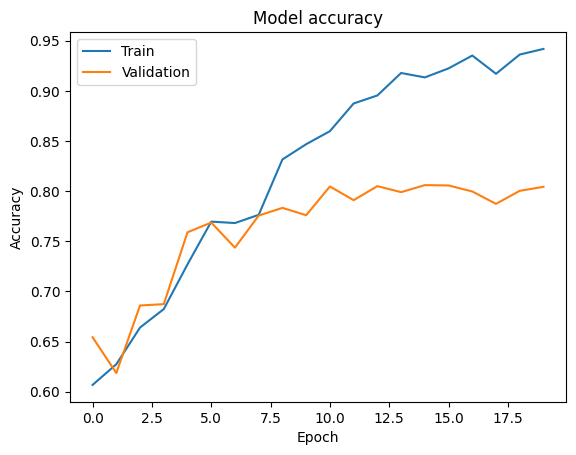

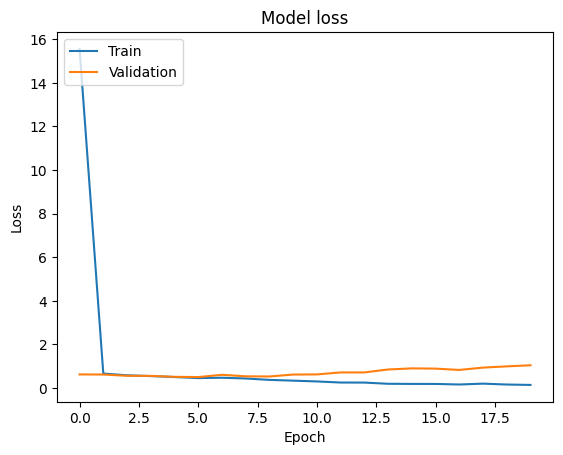

In [59]:
plot_history(histroy)

# AUC curve for binary classification

In [60]:
predicted_array=np.argmax(Test_predictions,axis=-1)
print(predicted_array)

[0 0 0 ... 1 1 0]


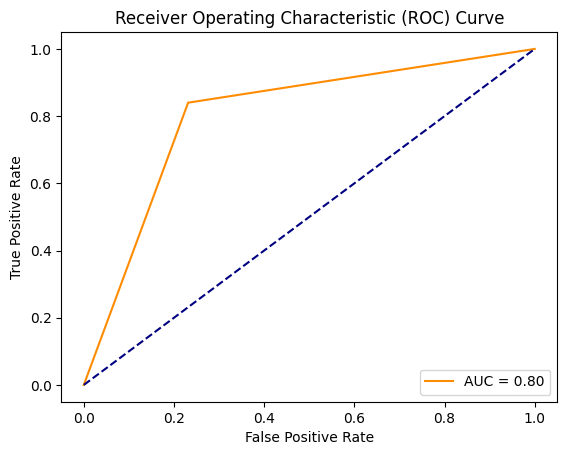

In [61]:
# Compute the false positive rate (fpr), true positive rate (tpr), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,predicted_array)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

`y_test` is a list of true labels for a binary classification problem (0 or 1), and `predicted_array` is a list of predicted scores for each sample.

The `roc_curve` function from Scikit-learn is used to calculate the false positive rate (`fpr`), true positive rate (`tpr`), and threshold values for the ROC curve. The `auc` function is then used to calculate the AUC score.

Finally, the ROC curve is plotted using the `plt.plot` function, with the false positive rate on the x-axis and the true positive rate on the y-axis. The `plt.plot` function is also used to plot the diagonal line (`[0, 1], [0, 1]`) to indicate random guessing, and to add labels and a legend to the plot.

#للتذكير

-true positive : 

بأختصاء هى صورة كان المفروض تتنبأ بيها وتنبأت بيها صح 

So true positive rate :

هو معدل تنبأ المودل بالصور اللى المفروض يتنبأ بيها وتنبأ بيها صح

-false positive :

بأختصاء هى صورة كان المفروض تتنبأ بيها وتنبأت بيها غلط
 
So false positive rate :

هو معدل تنبأ المودل بالصور اللى المفروض يتنبأ بيها وتنبأ بيها غلط

##Transfer Learning model

In [62]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
base_model=tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(100,100,3),
    classifier_activation="softmax",
)
    
base_model.trainable = True

x=base_model.output

x=GlobalAveragePooling2D()(x)

predictions=Dense(1, activation='sigmoid',name='Final')(x) 
model_1=Model(inputs=base_model.input , outputs=predictions)

#model.Load_weights(dire)

model_1.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

83683744/83683744 [==============================] - 3s 0us/step


In [63]:
def get_callbacks (model_name):
    callbacks =[]
    checkpoint = tf.keras.callbacks. ModelCheckpoint (filepath=f'model. {model_name}. h5', 
                                                      verbose=1, monitor='val_loss', mode='min')
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau (monitor = 'val_loss', factor=0.5, patience=5, verbose=2,
                        min_lr=0.0000001,min_delta=0.00001 ,mode='auto' )
    callbacks.append(anne)
    early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
   # earlystop = tf.keras.callbacks.arlyStopping(monitor='val_loss', patience=10) 
    callbacks.append(early_stopping)
    return callbacks
callbacks = get_callbacks('VGG16')
history2=model.fit( X_train,y_train, epochs=10, validation_data= [X_test,y_test],callbacks=[callbacks])

Epoch 1/10
155/157 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8569
Epoch 1: saving model to model. VGG16. h5


157/157 [==============================] - 8s 32ms/step - loss: 0.4129 - accuracy: 0.8572 - val_loss: 0.6042 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 2/10
154/157 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9190
Epoch 2: saving model to model. VGG16. h5


157/157 [==============================] - 5s 29ms/step - loss: 0.2113 - accuracy: 0.9198 - val_loss: 1.0023 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 3/10
154/157 [============================>.] - ETA: 0s - loss: 0.1655 - accuracy: 0.9357
Epoch 3: saving model to model. VGG16. h5


157/157 [==============================] - 4s 26ms/step - loss: 0.1651 - accuracy: 0.9360 - val_loss: 1.0651 - val_accuracy: 0.8103 - lr: 0.0010
Epoch 4/10
155/157 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.9147
Epoch 4: saving model to model. VGG16. h5


157/157 [==============================] - 4s 24ms/step - loss: 0.2512 - accuracy: 0.9138 - val_loss: 0.8921 - val_accuracy: 0.7010 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8434
Epoch 5: saving model to model. VGG16. h5


157/157 [==============================] - 4s 25ms/step - loss: 0.3912 - accuracy: 0.8434 - val_loss: 0.7753 - val_accuracy: 0.7913 - lr: 0.0010
Epoch 6/10
154/157 [============================>.] - ETA: 0s - loss: 0.1780 - accuracy: 0.9276
Epoch 6: saving model to model. VGG16. h5



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
157/157 [==============================] - 5s 29ms/step - loss: 0.1769 - accuracy: 0.9280 - val_loss: 0.9485 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 7/10
156/157 [============================>.] - ETA: 0s - loss: 0.1161 - accuracy: 0.9607
Epoch 7: saving model to model. VGG16. h5


157/157 [==============================] - 4s 25ms/step - loss: 0.1160 - accuracy: 0.9608 - val_loss: 1.0670 - val_accuracy: 0.8143 - lr: 5.0000e-04
Epoch 8/10
153/157 [============================>.] - ETA: 0s - loss: 0.1271 - accuracy: 0.9589
Epoch 8: saving model to model. VGG16. h5


157/157 [==============================] - 4s 25ms/step - loss: 0.1254 - accuracy: 0.9596 - val_loss: 0.9968 - val_accuracy: 0.8233 - lr: 5.0000e-04
Epoch 9/10
154/157 [============================>.] - ETA: 0s - loss: 0.0710 - accuracy: 0.9769
Epoch 9: saving model to model. VGG16. h5


157/157 [==============================] - 5s 30ms/step - loss: 0.0707 - accuracy: 0.9770 - val_loss: 1.3340 - val_accuracy: 0.8243 - lr: 5.0000e-04
Epoch 10/10
154/157 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9844
Epoch 10: saving model to model. VGG16. h5


157/157 [==============================] - 4s 27ms/step - loss: 0.0462 - accuracy: 0.9842 - val_loss: 1.5633 - val_accuracy: 0.8283 - lr: 5.0000e-04




#Don't have a good day , have a great day